In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# converted to csv and imported here
df = pd.read_csv('excavation_data.csv')

In [3]:
df.head()

,Truck Name,Days (ignition),Total Production,No. of Trips,Ignition On Hrs,Utilization Hrs,Distance (Km),Speed (Km/h),Loading Time (min),Unloading Time (min),Total Emissions
0,A-1,31,25020.21786,1312,489.077222,192.811911,2295.69,10.361135,3.522476,1.779959,10812.3
1,A-2,33,18638.81847,1160,505.339167,207.108319,2677.60,11.304072,3.027102,2.276468,12669.8
2,A-3,33,28038.32546,1427,552.815558,256.530825,3006.74,10.549813,3.517111,2.319812,15392.6
3,A-4,33,26247.80188,1457,563.888889,223.470542,2654.58,10.808195,2.714766,2.409837,5139.0
4,A-5,32,27027.86375,1450,525.983056,258.806931,2742.82,9.526938,3.399480,2.061426,4903.3


In [4]:
df.shape
#data size upload - verified

(50, 11)

In [5]:
# days of ignition is above 31 for october
# this could be calculation error (maybe sep31st and nov1st included)
# field investigation required 
df['Days (ignition)'] = df['Days (ignition)'] - 3

### MISSING DATA HANDLING

In [6]:
display(df[df['No. of Trips'].isin([0, np.nan])])
#3 rows (6% of data) with 0 trips

df1 = df[df['No. of Trips'] != 0].copy()
df1 =df1.reset_index(drop=True)

,Truck Name,Days (ignition),Total Production,No. of Trips,Ignition On Hrs,Utilization Hrs,Distance (Km),Speed (Km/h),Loading Time (min),Unloading Time (min),Total Emissions
20,A-21,-1,0.0,0,0.295833,0.000000,0.02,NaN,NaN,NaN,0.2
32,A-33,2,0.0,0,1.455556,0.000556,0.26,6.0,NaN,NaN,10.6
45,A-46,-1,0.0,0,0.014167,0.000000,0.00,NaN,NaN,NaN,0.0


#### Ask onsite team the reason of 0 trip vehicles, removed from analysis for now

In [7]:
df1.describe()

,Days (ignition),Total Production,No. of Trips,Ignition On Hrs,Utilization Hrs,Distance (Km),Speed (Km/h),Loading Time (min),Unloading Time (min),Total Emissions
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,46.000000,47.000000
mean,28.851064,18604.348143,1002.851064,451.990124,194.293039,2436.952766,13.438676,3.387113,2.109993,7679.346809
std,3.021508,9772.061333,507.365488,148.883203,79.867343,868.013681,8.569597,1.166894,0.306798,4825.309753
min,15.000000,333.609923,17.000000,59.876389,6.502222,134.760000,7.473582,0.000000,1.327083,0.000000
25%,29.000000,13561.058585,827.500000,469.350971,191.206226,2300.055000,9.783130,2.959384,1.995238,4008.550000
50%,30.000000,23079.566510,1200.000000,515.025000,219.727764,2510.620000,10.364237,3.615622,2.172524,7798.300000
75%,30.000000,26050.059850,1371.500000,532.501806,242.598875,2821.300000,11.466098,4.060876,2.309635,12152.400000
max,31.000000,30844.273240,1576.000000,565.829722,331.590278,4745.590000,45.395546,5.028708,2.740972,16865.400000


In [8]:
df3 = df1.drop('Truck Name', axis=1).copy()
df3 = df3[(df3 != 0).all(axis=1) & df3.notna().all(axis=1)]

### CORRELATION

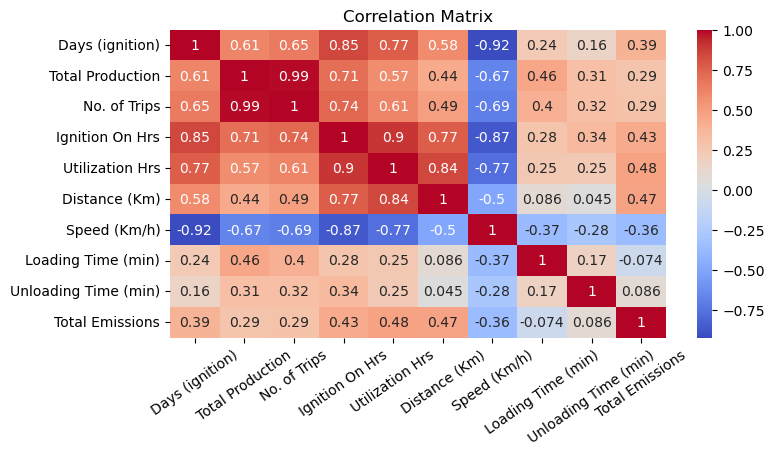

In [9]:
df3.corr()
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=35)
plt.title('Correlation Matrix')
plt.show()

#### Extreme multicollinearity between Total Production & No. of Trips ->	We shall remove  No. of Trips  (if we have to build an ML model
#### High correlation between Speed, Days (ignition) and Ignition On Hrs as well, we shall retain them for certain analysis but remove if need be

In [10]:
#df1 = df1.drop(['No. of Trips'], axis=1)

### IMPUTATION

In [11]:
#checking for any 0 or nan value
df1.columns[df1.isin([0, np.nan]).any()]

# 8 coloumns are completely filled, 3 require attention

Index(['Loading Time (min)', 'Unloading Time (min)', 'Total Emissions'], dtype='object')

In [12]:
df1[df1[['Total Emissions', 'Loading Time (min)','Unloading Time (min)']].isin([0, np.nan]).any(axis=1)]

# only a very few rows (max 3) of each of these coloums are 0 or nan

,Truck Name,Days (ignition),Total Production,No. of Trips,Ignition On Hrs,Utilization Hrs,Distance (Km),Speed (Km/h),Loading Time (min),Unloading Time (min),Total Emissions
10,A-11,30,3355.111621,187,213.762492,18.056114,195.00,8.052471,0.000000,2.740972,2931.9
33,A-36,30,2199.658536,125,177.051389,16.805000,180.48,7.473582,0.000000,2.396528,1801.7
36,A-39,31,4376.158593,282,374.352772,134.781392,4745.59,34.654694,4.507751,1.612927,0.0
38,A-41,28,814.754538,121,174.578889,92.239428,3693.43,38.546182,1.504136,1.431888,0.0
44,A-48,15,413.233574,20,91.208611,48.665278,2261.10,45.395546,0.000000,1.383333,891.5
46,A-50,24,333.609923,17,59.876389,6.502222,134.76,20.960331,1.574074,NaN,327.0


In [13]:
# intuitively loading and unloading could be correlated, but correlation matrix say the opposite
# we know Loading Time (min)& Total Emissions can never be truly 0, hence we assume them random error from onsite 
df2 = df1.copy()
columns_to_impute= ['Total Emissions', 'Loading Time (min)','Unloading Time (min)']
df2[columns_to_impute] = df2[columns_to_impute].replace(0, np.nan)

#### We shall use mean imputation. Though they are random error, conducting MICE can lead to overfitting (just 50 rows)

In [14]:
df2[columns_to_impute] = df2[columns_to_impute].fillna(df2[columns_to_impute].mean())
df2.head()

,Truck Name,Days (ignition),Total Production,No. of Trips,Ignition On Hrs,Utilization Hrs,Distance (Km),Speed (Km/h),Loading Time (min),Unloading Time (min),Total Emissions
0,A-1,28,25020.21786,1312,489.077222,192.811911,2295.69,10.361135,3.522476,1.779959,10812.3
1,A-2,30,18638.81847,1160,505.339167,207.108319,2677.60,11.304072,3.027102,2.276468,12669.8
2,A-3,30,28038.32546,1427,552.815558,256.530825,3006.74,10.549813,3.517111,2.319812,15392.6
3,A-4,30,26247.80188,1457,563.888889,223.470542,2654.58,10.808195,2.714766,2.409837,5139.0
4,A-5,29,27027.86375,1450,525.983056,258.806931,2742.82,9.526938,3.399480,2.061426,4903.3


### OUTLIERS

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
df4 = scaler.fit_transform(df2.drop('Truck Name', axis=1))
df4 = pd.DataFrame(df4, columns=df2.columns[1:])
df4.head()

,Days (ignition),Total Production,No. of Trips,Ignition On Hrs,Utilization Hrs,Distance (Km),Speed (Km/h),Loading Time (min),Unloading Time (min),Total Emissions
0,-0.284714,0.663650,0.615909,0.251795,-0.018745,-0.164502,-0.363006,-0.128823,-1.099380,0.621638
1,0.384364,0.003566,0.313084,0.362202,0.162192,0.280236,-0.251783,-0.796512,0.554548,1.035262
2,0.384364,0.975840,0.845021,0.684533,0.787689,0.663523,-0.340751,-0.136054,0.698933,1.641569
3,0.384364,0.790630,0.904789,0.759713,0.369274,0.253429,-0.310274,-1.217492,0.998817,-0.641680
4,0.049825,0.871319,0.890843,0.502359,0.816496,0.356186,-0.461402,-0.294603,-0.161781,-0.694165


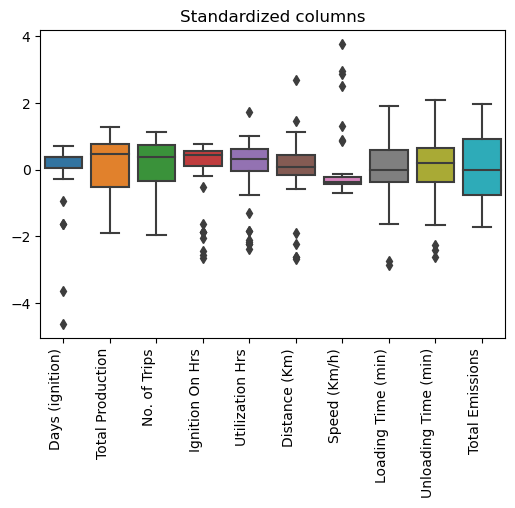

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df4)
plt.title('Standardized columns')
plt.xticks(rotation=90, ha='right')
plt.show()

In [18]:
from scipy import stats

In [19]:
z_scores = stats.zscore(df4)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

df4["Truck Name"] = df2["Truck Name"]
df2[outliers.any(axis=1)]

,Truck Name,Days (ignition),Total Production,No. of Trips,Ignition On Hrs,Utilization Hrs,Distance (Km),Speed (Km/h),Loading Time (min),Unloading Time (min),Total Emissions
37,A-40,18,1226.953146,65,150.619442,48.133611,1944.76,37.693059,2.891667,2.049306,3065.7
44,A-48,15,413.233574,20,91.208611,48.665278,2261.10,45.395546,3.618053,1.383333,891.5


#### Outlier does not seem to be data errors or random error
##### Very much possible the day of ignition were less for particular trucks, however speed limit is 25kmph, and Truck A-48 is violating it by far

### ANALYSIS - PROJECT PROGRESS

In [20]:
total_exc = 2200000
print("Total excavation required (m3) ->",round(total_exc))
oct_exc = df2["Total Production"].sum()
print("Total excavation in October (m3) ->",round(oct_exc))
oct_exc_p = oct_exc*100/total_exc
print("Excavation completed in October (%) ->", round(oct_exc_p ))
oct_rate = oct_exc/31
print("Daily excavation in October (m3) ->", round(oct_rate ))
print("No of days to complete excavation required at the october rate ->", round((total_exc-oct_exc)/(oct_rate)))


Total excavation required (m3) -> 2200000
Total excavation in October (m3) -> 874404
Excavation completed in October (%) -> 40
Daily excavation in October (m3) -> 28207
No of days to complete excavation required at the october rate -> 47


##### Excavation is expected to completed by mid december (17th) at october rate

### ANALYSIS - EMISSION INVESTIGATION

In [21]:
z_scores_emissions = stats.zscore(df4['Total Emissions'])

outliers_emissions = (z_scores_emissions > 1.5)
emissions_df = df4[outliers_emissions]
high_em = df2[outliers_emissions]
high_em = high_em[['Truck Name','Total Emissions']]
high_em

,Truck Name,Total Emissions
2,A-3,15392.6
7,A-8,15550.1
15,A-16,16865.4
21,A-23,14814.6


In [22]:
print("Average emission from the fleet ->", round(df2["Total Emissions"].mean()))

Average emission from the fleet -> 8021


#### Lets analyse the impact of removal of 4 trucks with higher emmision (~2x of average truck emission) from the fleet 

In [23]:
df5 = df2.drop(df2[outliers_emissions].index)

In [24]:
oct_exc = df5["Total Production"].sum()
print("Total excavation in October (m3) ->",round(oct_exc))
oct_exc_p = oct_exc*100/total_exc
print("Excavation completed in October (%) ->", round(oct_exc_p ))
oct_rate = oct_exc/31
print("Daily excavation in October (m3) ->", round(oct_rate ))
print("No of days to complete excavation required at the october rate ->", round((total_exc-oct_exc)/(oct_rate)))


Total excavation in October (m3) -> 775014
Excavation completed in October (%) -> 35
Daily excavation in October (m3) -> 25000
No of days to complete excavation required at the october rate -> 57


##### Even after removal of high emission trucks, we shall still be able to complete the excavation before deadline

In [25]:
emssion_redu = (df2["Total Emissions"].sum() - df5["Total Emissions"].sum())
print("Emission reduced ->", round(emssion_redu))
print("Emission reduced ->", round(emssion_redu*100/df5["Total Emissions"].sum(),1), "%")

Emission reduced -> 62623
Emission reduced -> 19.9 %


##### This decision will lead to a 20% decrease in the total emission in the next 2 months

### ANALYSIS - SPEED LIMIT

#### Due to safety reasons cannot move more than 25 km/hour speed.

since what we have is avg (not max) speed, we shall lower the threshold by 3 to be more precise in the analysis


In [26]:
df5[df5['Speed (Km/h)'] > 22]
spd = df5[df5['Speed (Km/h)'] > 22]
spd = spd[['Truck Name','Distance (Km)','Speed (Km/h)',"Total Production"]]
spd

,Truck Name,Distance (Km),Speed (Km/h),Total Production
19,A-20,804.96,24.630373,1207.373682
36,A-39,4745.59,34.654694,4376.158593
37,A-40,1944.76,37.693059,1226.953146
38,A-41,3693.43,38.546182,814.754538
44,A-48,2261.10,45.395546,413.233574


In [27]:
df5["Total Production"].mean()

18023.577835790697

#### Sum of Total Production of these 5 trucks is less than the prodcution of 1 average truck                          
Due to its non safe driving coupled with lower efficiency, we have to notify this matter to the superviser of the drivers                                                  
It could also be that these are not normal trucks but high speed, less capacity truck in safe environment with different tasks, in that case we need to remove them from certain analysis (such as production time) however involve them in certain analysis (such as cost analsyis)

### ANALYSIS - EFFICIENCY

##### We observed good correlation (0.7) between production and ignition on hrs

### Lets introduce a metrics
#### Efficiency = Total Production / Ignition On Hrs

In [28]:
df6 = df5.copy()
df6['Efficiency'] = df6['Total Production'] / df6['Ignition On Hrs']
df6['Daily Ignition On Hrs'] = df6['Ignition On Hrs'] / df6['Days (ignition)']

df6.head()

,Truck Name,Days (ignition),Total Production,No. of Trips,Ignition On Hrs,Utilization Hrs,Distance (Km),Speed (Km/h),Loading Time (min),Unloading Time (min),Total Emissions,Efficiency,Daily Ignition On Hrs
0,A-1,28,25020.21786,1312,489.077222,192.811911,2295.69,10.361135,3.522476,1.779959,10812.3,51.158011,17.467044
1,A-2,30,18638.81847,1160,505.339167,207.108319,2677.60,11.304072,3.027102,2.276468,12669.8,36.883780,16.844639
3,A-4,30,26247.80188,1457,563.888889,223.470542,2654.58,10.808195,2.714766,2.409837,5139.0,46.547826,18.796296
4,A-5,29,27027.86375,1450,525.983056,258.806931,2742.82,9.526938,3.399480,2.061426,4903.3,51.385427,18.137347
5,A-6,28,24061.73806,1195,425.992222,177.835517,2266.85,11.404089,3.279764,2.016643,10954.8,56.483984,15.214008


In [29]:
metrics_df = df6[['Efficiency']]
metrics_df.reset_index()

z_scores_metric = stats.zscore(metrics_df)
outliers_metric = (z_scores_metric < -1.5)
metric_df = df6[outliers_metric.any(axis=1)]
metric_df

,Truck Name,Days (ignition),Total Production,No. of Trips,Ignition On Hrs,Utilization Hrs,Distance (Km),Speed (Km/h),Loading Time (min),Unloading Time (min),Total Emissions,Efficiency,Daily Ignition On Hrs
27,A-29,24,1249.308116,69,175.713333,22.679169,523.28,20.730801,3.488889,2.296852,1295.900000,7.109922,7.321389
29,A-31,30,3373.503492,196,556.374722,274.068594,3021.20,10.032445,3.030210,1.719394,8966.500000,6.063366,18.545824
37,A-40,18,1226.953146,65,150.619442,48.133611,1944.76,37.693059,2.891667,2.049306,3065.700000,8.146048,8.367747
38,A-41,28,814.754538,121,174.578889,92.239428,3693.43,38.546182,1.504136,1.431888,8020.651111,4.666971,6.234960
44,A-48,15,413.233574,20,91.208611,48.665278,2261.10,45.395546,3.618053,1.383333,891.500000,4.530642,6.080574
46,A-50,24,333.609923,17,59.876389,6.502222,134.76,20.960331,1.574074,2.109993,327.000000,5.571644,2.494850


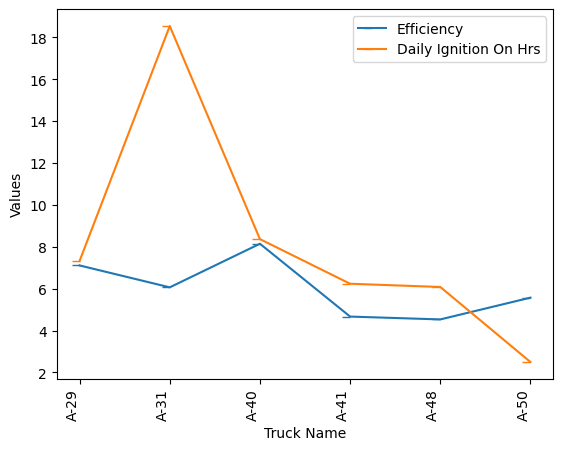

In [30]:
plt.plot(metric_df['Truck Name'], metric_df['Efficiency'], label='Efficiency', marker=0)
plt.plot(metric_df['Truck Name'], metric_df['Daily Ignition On Hrs'], label='Daily Ignition On Hrs', marker=0)

plt.xlabel('Truck Name')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Values')
plt.legend()

#### A20 A50 A41 A48  - field report and maintainence report required

The 5 trucks have the least Efficiency might need maintainence

### HYPOTHESIS TESTING

In [31]:
import statsmodels.api as sm

#### We are not cosidering 'No. of trips' due to very high correlation with total production, to avoid multi-collinearity
Now we shall test the significance of other variable.
##### Null Hypothesis: There is no significant relationship between Total Production and other variables. alpha = 0.05

In [32]:
X = df6[['Days (ignition)','Ignition On Hrs', 'Utilization Hrs', 'Distance (Km)', 'Speed (Km/h)', 'Loading Time (min)', 'Unloading Time (min)', 'Total Emissions']]
y = df6['Total Production']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Production   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     12.09
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           5.57e-08
Time:                        00:34:58   Log-Likelihood:                -427.52
No. Observations:                  43   AIC:                             873.0
Df Residuals:                      34   BIC:                             888.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2052.7564 

##### p-value of Ignition On Hrs is 0.02 (<0.05), so we reject the null hypothesis and confidently state that Total Production is directly dependant on Ignition On Hrs 

## CLUSTERING

In [33]:
# Based on cost and production 

#### since cost is fixed for any truck at SAR1000/truck/day, we can substitute days (ignition) for cost

In [34]:
from sklearn.cluster import KMeans
import warnings

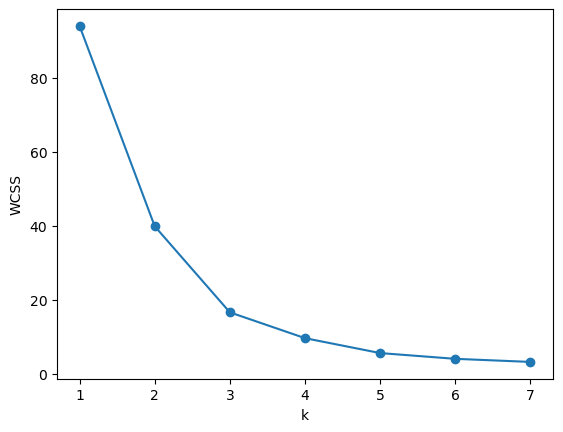

In [35]:
features = df4[['Days (ignition)', 'Total Production']]
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# elbow method
distortions = []
K_range = range(1, 8) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=38)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

### k = 3

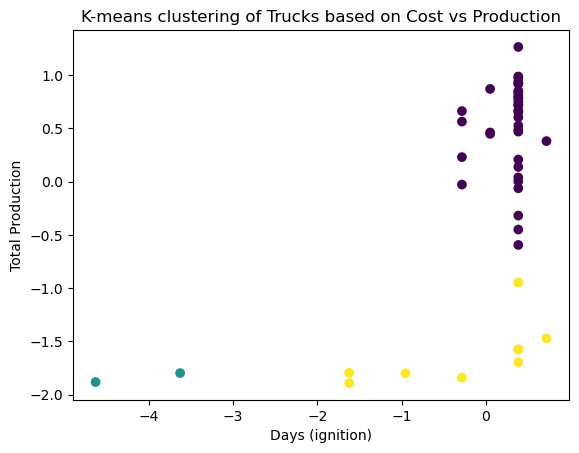

In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
df4['Cluster'] = kmeans.fit_predict(features)
cluster_df = df4[['Truck Name', 'Cluster']]

plt.scatter(df4['Days (ignition)'], df4['Total Production'], c=df4['Cluster'], cmap='viridis')
plt.xlabel('Days (ignition)')
plt.ylabel('Total Production')
plt.title('K-means clustering of Trucks based on Cost vs Production')
plt.show()

### More interesting cluster to look would be Production vs Emission


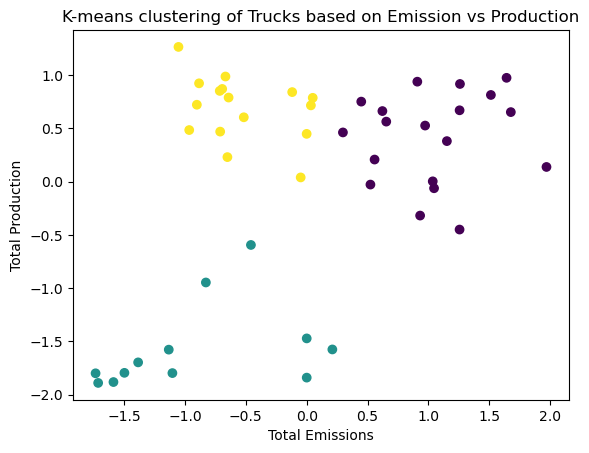

In [37]:
features = df4[['Total Emissions', 'Total Production']]
kmeans = KMeans(n_clusters=3, random_state=38)
df4['Cluster'] = kmeans.fit_predict(features)
cluster_df = df4[['Truck Name', 'Cluster']]

plt.scatter(df4['Total Emissions'], df4['Total Production'], c=df4['Cluster'], cmap='viridis')
plt.xlabel('Total Emissions')
plt.ylabel('Total Production')
plt.title('K-means clustering of Trucks based on Emission vs Production')
plt.show()

##### There are precisely 3 cluster -> LE-HP Yellow (promote), HE-HP Purple (discourage), LE-LP Green (utilise more for more data)

## COST BENIFIT ANALYSIS

#### Since costs here are fixed ( at per truck per day), lets do a cost-benefit analysis of the trucks we exluded on the basis of emission

In [38]:
avg_pro_exc =  df2[outliers_emissions]['Total Production'].mean()
avg_pro_inc = df6['Total Production'].mean()

increment_work = (avg_pro_exc - avg_pro_inc)/avg_pro_inc
increment_work

((1000 * 47) + (1000 * 4 * 1.38) - (1000 * 51)) / (1000 * 51)

0.02980392156862745

##### To do the same work Low emission truck would have to work for 38% more time than High emission trucks, adding a fixed cost of 38% (since truck cost is same). Other costs such as wages will also increase since more hours of work will be involved. So basically work of 4 trucks will be completed by 5.5 trucks. So for 51 day 4 truck would have costed 204k SAR, using only Low emission truck will cost you 282k SAR (+78k). For 51 days 50 truck would have costed 2550k, now 2628k. Only a 3% increase to total  cost of truck.

In [39]:
avg_em_ex =  df2[outliers_emissions]['Total Emissions'].mean()
avg_em_dec = df6['Total Emissions'].mean()
oct_em = df2['Total Emissions'].sum()

nov_em = df2['Total Emissions'].sum() - 4* (df2[outliers_emissions]['Total Emissions'].mean()) + 5.5 * (df6['Total Emissions'].mean())
(oct_em - nov_em) / oct_em



0.05946195817058654

### So 3% increase in total cost will result in 6% reduction in total emission

## UTILIZATION

Total Production vs Utilization hr; p vaaue = 0.840; so Utilization hr has no significance in Production
#### Lets define Utilization = (Total Production / Total Capacity) * 100

In [40]:
df6['Total Capacity'] = 22 * 0.85 * df6['No. of Trips']

In [41]:
df6['Utilization'] = df6['Total Production'] / df6['Total Capacity']

In [42]:
unsafe_df = df6[(df6['Utilization'] > 1.05)]
unsafe_df = unsafe_df[['Truck Name','Days (ignition)','Total Production','No. of Trips','Total Capacity','Utilization']]
unsafe_df

,Truck Name,Days (ignition),Total Production,No. of Trips,Total Capacity,Utilization
5,A-6,28,24061.738060,1195,22346.5,1.076756
22,A-24,30,26742.671200,1361,25450.7,1.050764
30,A-32,30,18011.559560,858,16044.6,1.122593
44,A-48,15,413.233574,20,374.0,1.104903


##### These 4 vehicle has come to our notice to have overloading consistently above its safe capacity (yellow in graph below)

In [43]:
low_ut_df = df6[(df6['Utilization'] < 0.8)]
low_ut_df = low_ut_df[['Truck Name','Days (ignition)','Total Production','No. of Trips','Total Capacity','Utilization']]
low_ut_df

,Truck Name,Days (ignition),Total Production,No. of Trips,Total Capacity,Utilization
19,A-20,26,1207.373682,84,1570.8,0.768636
20,A-22,30,12861.948650,987,18456.9,0.696864
38,A-41,28,814.754538,121,2262.7,0.360081


These 3 truck have untapped potential, filling less than 80% of the safe capacity overall (purple in graph below) and they collectively do the work of ~2 trucks. 
##### We should be able to save 1/50 (i.e. 2%) of the total cost if their potentials are tapped; also save Loading and Unloading time 


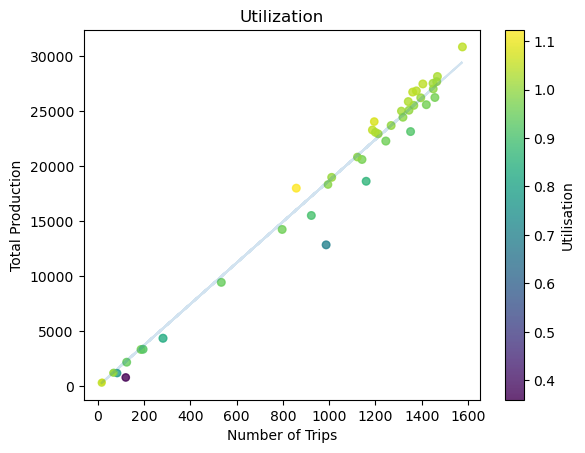

In [44]:
plt.scatter(df6['No. of Trips'], df6['Total Production'], s=df6['Days (ignition)'], c= df6['Utilization'], alpha=0.8)
plt.xlabel('Number of Trips')
plt.ylabel('Total Production')
plt.title('Utilization')
colorbar = plt.colorbar(label = 'Utilisation')

plt.plot(df6['No. of Trips'], 22 * 0.85 * df6['No. of Trips'],alpha = 0.2)

##### Most truck have an optimal utilisation (The blue line is safe capacity line 22 * 0.85 * No. of Trips)

## COST EFFICIENCY

Since Cost is Days (ignition), we will have to look if the every truck is cost effiecient 

In [45]:
df6['Trips per day'] = df6['No. of Trips'] / df6['Days (ignition)']

#### We can do a Pareto Analysis here
#### Lets see if which trucks fall in the top 80 Percentile of the production

In [46]:
cost_eff = df6.sort_values(by='Trips per day', ascending=False)
top_80_percent_trucks = cost_eff[cost_eff['Trips per day'].cumsum() <= 0.8 * cost_eff['Trips per day'].sum()]
len(top_80_percent_trucks)

25